El objetivo será mostrar como el algoritmo PCA nos permite tener una reducción de dimensionalidad de los datos.

Para este caso usaremos el dataset https://www.kaggle.com/datasets/zaurbegiev/my-dataset

Este Notebook es una muestra del resultado de haber llevado el curso 
"Machine Learning Inmersion" , impartido por Andre Chavez, en la plataforma virtual DMC.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#IMPORTANDO EL DATASET

data = pd.read_csv("/content/sample_data/credit_train.csv")
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [12]:
#OBSERVAMOS EL TAMAÑO DE NUESTRO DATA SET
data.shape

(100514, 19)

In [4]:
#HAY UNA GRAN CANTIDAD DE VALORES NULLS EN ALGUNAS VARIABLES
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [8]:
#PORCENTAJE DE VARIABLES MISSING RESPECTO A CADA VARIABLE
#PODEMOS VER QUE APROX LA MITAD DE LOS DATOS DE LA VARIABLE "Months since last delinquent"
#SON NULLS
data.isnull().sum()/data.shape[0]*100

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

In [10]:
columnas_totales = data.columns.tolist()
columnas_totales

['Loan ID',
 'Customer ID',
 'Loan Status',
 'Current Loan Amount',
 'Term',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [41]:
columnas_categoricas = ["Loan ID","Customer ID","Loan Status","Term","Years in current job","Home Ownership","Purpose"]

In [42]:
columnas_numericas = [x for x in columnas_totales if x not in columnas_categoricas ] 

In [40]:
#LAS VARIABLES QUE TRABAJAREMOS
columnas_numericas

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [31]:
#COMPLETAREMOS LOS DATOS DE LAS VARIABLES  
#USAMOS EL METODO DE IMPUTACION DE DATOS

from sklearn.impute import SimpleImputer

# Generamos el imputador iterativo - Imputacion Univariada Numerica

imp_univ_num = SimpleImputer(missing_values=np.nan, strategy='median')

In [46]:
data_imputacion_numerica = data[columnas_numericas]

In [47]:
data_imputacion_numerica.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,NaN,NaN,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,NaN,NaN,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [54]:
# Realizamos la imputación univariada en una nueva base de datos - Variables Numericas

# ajustamos el algoritmo
imp_univ_num.fit(data_imputacion_numerica)

# creamos el nuevo dataset
data_imputada = pd.DataFrame(data = imp_univ_num.transform(data_imputacion_numerica), 
                             columns = data_imputacion_numerica.columns,
                             dtype='float')

In [50]:
#Ya tenemos los datos completos

data_imputada.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,724.0,1174162.0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,724.0,1174162.0,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [58]:
#Veamos la matriz de correlacion

matrix_correlacion = data_imputada.corr( method = 'spearman')
matrix_correlacion

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.027349,0.344734,0.337212,0.145303,-0.013365,0.175906,-0.073004,0.368645,0.358199,-0.078361,0.013207
Credit Score,-0.027349,1.000000,0.013958,-0.069394,0.073365,0.024265,-0.010427,-0.061080,-0.005549,0.127646,-0.046137,-0.026750
Annual Income,0.344734,0.013958,1.000000,0.521531,0.229326,-0.047270,0.211388,-0.036053,0.341927,0.343845,-0.052156,0.036160
Monthly Debt,0.337212,-0.069394,0.521531,1.000000,0.217470,-0.036426,0.461004,-0.065863,0.525364,0.430064,-0.075836,0.021179
Years of Credit History,0.145303,0.073365,0.229326,0.217470,1.000000,-0.028846,0.146057,0.080146,0.266927,0.285389,0.079871,0.020090
Months since last delinquent,-0.013365,0.024265,-0.047270,-0.036426,-0.028846,1.000000,-0.023493,0.071310,-0.000689,-0.012777,0.072567,0.007362
Number of Open Accounts,0.175906,-0.010427,0.211388,0.461004,0.146057,-0.023493,1.000000,-0.008085,0.373425,0.489550,-0.017311,0.012726
Number of Credit Problems,-0.073004,-0.061080,-0.036053,-0.065863,0.080146,0.071310,-0.008085,1.000000,-0.205606,-0.173461,0.868081,0.368331
Current Credit Balance,0.368645,-0.005549,0.341927,0.525364,0.266927,-0.000689,0.373425,-0.205606,1.000000,0.778258,-0.198088,-0.032023
Maximum Open Credit,0.358199,0.127646,0.343845,0.430064,0.285389,-0.012777,0.489550,-0.173461,0.778258,1.000000,-0.169147,-0.023040


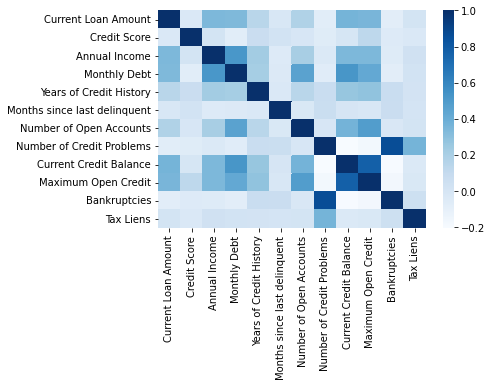

In [64]:
#Podemos intentar verlo como un heatmap para poder buscar si los datos guardan linealidad entre ellos

import seaborn as sns

sns.heatmap(matrix_correlacion, cmap = "Blues")

# Podemos ver que algunas variables guardan relacion entre ellas


In [65]:
#Actualmente tenemos 12 columnas, buscaremos reducir esa cantidad

data_imputada.shape

(100514, 12)

In [152]:
# Antes de poder aplicar el algoritmo de PCA, escalaremos los datos

from sklearn.preprocessing import scale 

data_escalada = scale(data_imputada)

In [155]:
data_escalada = pd.DataFrame(data_escalada, #dataset a convertir
                index = data_imputada.index, #mantenemos los mismos indices
                columns = data_imputada.columns   #mantenemos las mismas columnas
                )

data_escalada.head()

#Notamos que ahora los datos estan escalados 

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,-0.354950,-0.224333,-0.175552,-1.090683,-0.141827,-0.089639,-1.025030,1.728659,-0.175917,-0.040960,2.520948,-0.113236
1,-0.360723,-0.213060,-0.168699,1.221515,0.415480,-1.680183,4.777677,-0.347682,-0.171157,0.010940,-0.333707,-0.113236
2,2.784293,-0.200283,0.918183,0.884297,-0.470495,-0.288457,1.376090,1.728659,0.010106,-0.001101,-0.333707,-0.113236
3,-0.358032,-0.215314,-0.546033,-0.800258,-0.884903,-0.089639,-0.424750,-0.347682,-0.100930,-0.044522,-0.333707,-0.113236
4,-0.363438,-0.213060,-0.168699,0.179402,-1.728008,-0.089639,0.775810,-0.347682,-0.108576,-0.039713,-0.333707,-0.113236


In [156]:
# Con los datos escalados, procederemos a aplicar el algoritmo PCA

from sklearn.decomposition import PCA 

pca = PCA (n_components = 12)

pca.fit(data_escalada)

PCA(n_components=12)

In [157]:
#Promedio de los autovalores de la matriz de covarianza
pca.explained_variance_.mean()

1.0000099489618253

In [158]:
# Autovalores asociados a cada variables

varianza_explicada = pca.explained_variance_

varianza_explicada.tolist()

# EL CRITERIO KAISSER NOS SUGIERE QUE NOS QUEDEMOS CON AQUELLAS VARIABLES
# CUYOS AUTOVALORES SEAN MAYORES AL PROMEDIO DE LOS AUTOVALORES
# DE LA MATRIZ DE COVARIANZA
# ES DECIR, NOS QUEDAMOS CON 5 de 12 COMPONENTES

[2.2124453566820956,
 1.944432861536337,
 1.0809376985106205,
 1.018198379344854,
 1.0062351636146867,
 0.9574737814293391,
 0.9251696182594507,
 0.8726364473525444,
 0.8435514183580626,
 0.65503880657113,
 0.4132431535877196,
 0.07075670229506438]

In [159]:
# PROPORCION DE LA VARIANZA POR CADA COMPONENTE PRINCIPAL

varianza_explicada_ratio = pca.explained_variance_ratio_

varianza_explicada_ratio.tolist()

[0.1843686121138909,
 0.1620344597200406,
 0.09007724536747622,
 0.08484902078573578,
 0.08385209605992122,
 0.07978868797116755,
 0.07709670115615089,
 0.07271898046768471,
 0.07029525216505826,
 0.05458602413999047,
 0.03443658685735526,
 0.00589633319552816]

In [160]:
varianza_explicada_ratio.cumsum().tolist()

#Segun el criterio de la varianza explicada, debemos quedarnos con una cantidad total
#que tenga un 80% de la varianza total de los datos
#en este caso, nos quedariamos con 8 componentes de 12

[0.1843686121138909,
 0.3464030718339315,
 0.4364803172014077,
 0.5213293379871434,
 0.6051814340470647,
 0.6849701220182323,
 0.7620668231743831,
 0.8347858036420679,
 0.9050810558071262,
 0.9596670799471166,
 0.9941036668044719,
 1.0]

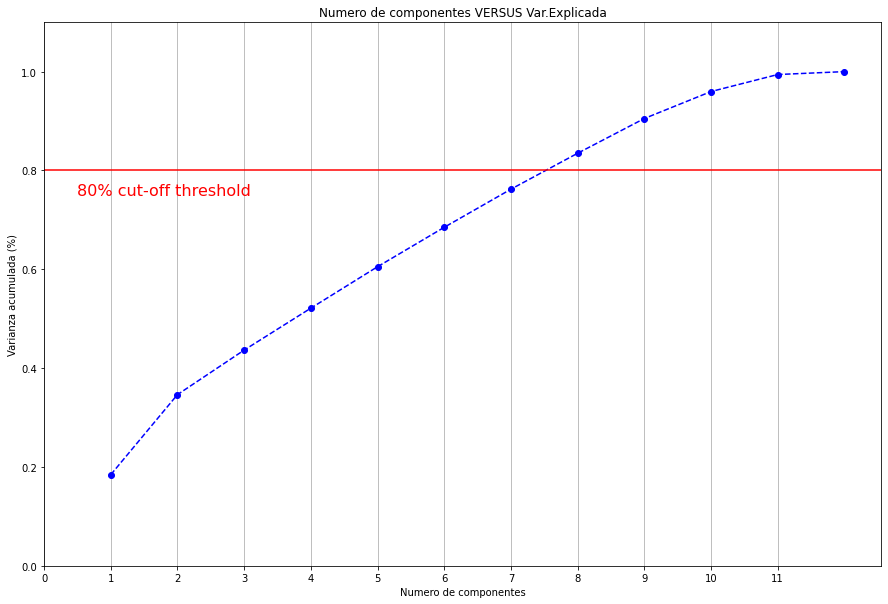

In [161]:
#Veamos graficamente la varianza acumulada

fig, ax = plt.subplots()
# Configurando el ancho y alto
fig.set_figheight(10)
fig.set_figwidth(15)

# x and y values
xi = np.arange(1, 13, step=1)
y = np.cumsum(varianza_explicada_ratio)
plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Numero de componentes')
plt.xticks(np.arange(0, 12, step=1))  # change from 0-based array index to 1-based human-readable label
plt.ylabel('Varianza acumulada (%)')
plt.title('Numero de componentes VERSUS Var.Explicada')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.75, '80% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

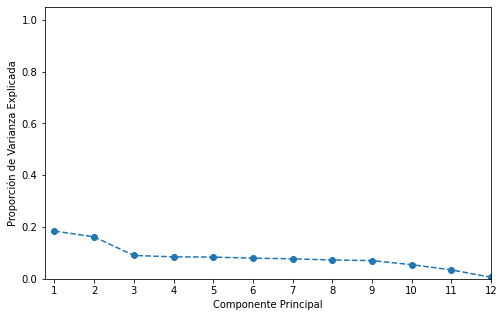

In [162]:
#Grafico de Catell 

plt.figure(figsize=(8,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], pca.explained_variance_ratio_, '--o')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

In [167]:
#La decision tomada sera: quedarnos con 8 de 12 componentes
#para asi tener 80% de varianza asegurada